# Ideas on structure discovering

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def insert_random(s, n, times):
    l=len(s)
    res = s[:]
    for i in range(0,times):
        pos = random.randint(0,len(res))
        res = res[:pos] + [ n[random.randint(0,len(n)-1)] ] + res[pos:]
    return res

In [3]:
def random_noise(n, length):
    s=[]
    for i in range(length):
        s.append( n[random.randint(0,len(n)-1)] )
    return s

In [4]:
def interleave_path(p, t):
    path=p[:]
    trace=t[:]
    start = 0
    step = int( len(trace) / len(path) ) + 1
    while len(path)>0:
        s = path.pop(0)
        pos = random.randint(start, min(start+step, len(trace)) )
        start = pos+1
        trace = trace[:pos] + [s] + trace[pos:]
    return trace

In [5]:
def get_succesor_edges( traces ):
    edges = {}

    for this_trace in traces:
        for idx in range(0, len(this_trace)-1):
            partial_subtrace = this_trace[idx:]
            s0 = partial_subtrace.pop(0)
            try:
                k_plus_1 = partial_subtrace.index(s0)
            except:
                k_plus_1 = len(partial_subtrace)
            # This is the subtrace T, the maximal that not contains s0
            T=partial_subtrace[:k_plus_1]

            # Avoid ABBBB, count just the first AB
#             edges_in_this_chunk = []

            # Edges found:
            for si in T:
                e = (s0, si)
#                 if e not in edges_in_this_chunk:
#                     edges_in_this_chunk.append(e)
                if e in edges.keys():
                    edges[e] = edges[e] + 1
                else:
                    edges[e] = 1
    return edges

In [6]:
def cluster_same_freq(edges, threshold=0):
    weights = list(set(edges.values()))
    sorted(weights)
    groups = {}
    for e in edges.keys():
        w  = edges[e]
        if w in groups.keys():
            groups[w].append( e )
        else:
            groups[w] = [e]
            
    remove_smaller = []
    for w in groups.keys():
        if len( groups[w] ) < threshold:
            remove_smaller.append(w)
    for w in remove_smaller:
        del(groups[w])
        
    return groups
#     print(groups)

In [7]:
def testLeftNode(graph, serials=[]):

    candid=[]
    for serial in serials:
        # Test if Sk can be append at the left
        for Sk in [ Sk for (Sk, Sl) in graph.edges() if Sl == serial[0] ]:

            # Test (Sk, node) exists for all nodes
            if all( [(Sk,node) in graph.edges() for node in serial] ):
                
                # Continue the search to the left
                candid = candid + testLeftNode(graph, [[Sk] + serial] ) 

    return serials + candid

In [8]:
def get_maximal_serials(candidates, verbose=False):
    if len(candidates) <= 1:
        return candidates

    first, c2 = candidates[0], candidates[1:]

#     if any( [ len(set(first).intersection(set(n))) == len(set(first)) for n in c2] ):
    if any( [ len(first) < len(n) and set(first).intersection(set(n)) for n in c2] ):
        if verbose:
            print("%s is already part of another" % first)
        return get_maximal_serials( c2, verbose )
    else:
        return [first] + get_maximal_serials( c2, verbose )
    

In [9]:
# symbols
s = list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()_+=-{}[]\|<>,./?")

## Single Serial Path Discovery

Any trace of the form ```ABCDE``` can be described by a single path without loops in a directed graph. If we define *noise* as any symbol in between the trace different from symbols of the trace we have the following examples:

In [10]:
noisy_symbols = s[26:65]
# noisy_symbols = s[9:65]
"".join(noisy_symbols)

'abcdefghijklmnopqrstuvwxyz0123456789!@#'

In the set below, the goal is to automatically find the serial path ```ABCDE``` and discard the noise.

In [11]:
NUM_INSTANCES=30

### Create dataset

In [12]:
# Serial Path
serial_path = list("ABCDE")
serial_path

['A', 'B', 'C', 'D', 'E']

In [13]:
# Serial Path with random symbols
traces = []
for i in range(NUM_INSTANCES): # Number of instances
    traces.append ( insert_random(serial_path, noisy_symbols, len(serial_path)*20 ))

for t in traces[:20]:
    print( "".join(t) )

#3u6xlptApeyqt4p@kjn92#jt2B86!n!kqcC33j!Dknc523@!0jw8oufbs2v4bwlasd@0@b4pof540k922bac8f!sccazE6uv2h2d6iqx
k92k#6z@74cct5k6wz3rpekcgluit@#@pxhxAgo3avl9jcaq9vp0adoBlps!7b@wp1@!m6im7Cc611rzc@pgj#zdD@azsxEh0vwelpvrj
cz5e6bvi6sh23i06iAek856i0zuhcy8@glloB0Ceoe9dfahcsd##fb0aryrg6bb6r42weuDz9e2#xElrsp7fs1xqk7i1l5zrju12vqq0o
8003A@wusmmlpg@pza84fdda2jyt17gB6uvzvcsCyiiyeg6ely3md!gv@pjxwglhtsctDnaEn9i@gh@s56#6att013insrc8ti2wr3d0x
tk#3Ainehdy2vaeBi!x7doiny8tm#!f2@xr7bajxrCcoplm7tyl8tu9#4pswtmhwqx4ampDo5lprocsncbmsj!fpmdtz9bir#kE@ck2su
l9t40ug2@yahk!gyd74wd04s#aA9Bd2696w6i50fevu!g7nb93ucw@ez7zsCkdbty545#ulu1uzr4doop6D@hb5#mbEt86i1p!6#lf@36
3zj8st1inm2hg@1zei1u8hAryj#h2mf380aBCnj7nyr72mwvD#bjjm!glqryErd2msew6ubnfpah41nk3d@w3i1zcz9vxkv3f8yvdy170
tm@aqaelgt55beyu#10brAxtBwmb9CDwo@woteazjfckd0h!wta2iog2cbfheh3!g7w#9qj95htd3mubvr@!i94po0uf44i8zzdso1Euy
g!!7v!e@bnjifaa5wi0o5o23p3jktv9Aby@redcx9qBo!71bkzzeaxod!z7eb9r6lCnbnsiq6wnDdwf6j48E0@@pwldd4dac1286tmsdw
bx037yy67w6q1eseuu61kr2ik3z0y8xkk9AyBbcsrvkogd

## Count successors edges of same symbol

Build an adjacency matrix that counts how many edges $(s_0, s_i)$ are in the trace $T=s_0 ... s_i ... s_k$ where $s_i  \neq s_0, \forall 0 < i <= k$

In [14]:
edges1 = get_succesor_edges(traces)

In [15]:
edges_group1 = cluster_same_freq(edges1)

In [16]:
G = {}
for weight in sorted(edges_group1.keys()):
    G[weight] = nx.DiGraph()
    G[weight].add_edges_from( edges_group1[weight] )
        

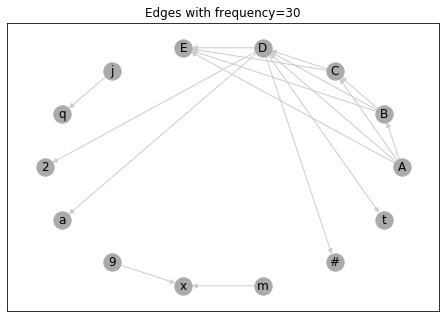

In [17]:
# Graph the candidates

MIN_EDGES_PER_FREQ=4 # min edges per group
MIN_FREQ=len(traces)/1.5

for weight in G.keys():
#     if weight >= MIN_FREQ and len(edges_group1[weight]) >= MIN_EDGES_PER_FREQ:
    if weight == NUM_INSTANCES:
        nx.draw_circular(G[weight], edge_color="#CCCCCC", node_color="#AAAAAA", with_labels=True)
        #Plot the graph
        plt.axis('on')
        plt.title('Edges with frequency=%d' % weight)
# #     plt.savefig("chess_legends.png") 
        plt.show() 

My claim is that a serial process $S=s_0...s_L$ will be shown as a graph made with the set of edges $(u,v)$ that appears the same amount of times in the set of traces $\Gamma$, and also the adjacency matrix of same frequency edges $M_{freq}$ can be chosen by reordering the nodes such that $\forall 0 < i, j < L$:

* $M_{ii}=0$
* $M_{ij}=1,  i < j $ (1 in upper diagonal)
* $M_{ij}=0,  j < i $ (0 in lower diagonal)

Note 1: that this $S$ is not necessarily unique.

Note 2: $M_{ii}=0$ by construction of the graph, given they have no loops.

In [18]:
nx.to_numpy_matrix(G[NUM_INSTANCES])

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

But... to check the permutations of $ N $ columns implies to check $N!$ possibilities. Then, a new method different than brute force must be found. 

A simple property (1) is that if a serial path $S$ contains the edges $(s_0, s_1)$, $(s_1, s_2)$, then $(s_0, s_2)$ must exists too. A stronger property (2) is going backward: if $s_{L-p}...s_{L-1}...s_l$ are the last $p$ elements of a serial path of lenght $L$, then a node $s_k$ can be added at the left iff the edges $(s_k, s_{L-q})$ exists for all $0 < q < p$. A third property (3) comes from the observation that any subset of $S$ is also a valid path, then the goal is to search the **maximal** serial path $S$ sharing the same nodes.

Then, let's search in the connection space... backward!

In [19]:
thisG = G[NUM_INSTANCES]
candidates = []
for (u,v) in list(thisG.edges()):
    serial=[u,v]
    candidates = candidates + testLeftNode(thisG, [serial] )[1:]

In [20]:
for c in candidates:
    print(c)

['A', 'B', 'C']
['A', 'B', 'D']
['A', 'B', 'E']
['A', 'C', 'D']
['B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'C', 'E']
['B', 'C', 'E']
['A', 'B', 'C', 'E']
['A', 'D', 'E']
['B', 'D', 'E']
['A', 'B', 'D', 'E']
['C', 'D', 'E']
['A', 'C', 'D', 'E']
['B', 'C', 'D', 'E']
['A', 'B', 'C', 'D', 'E']


In [21]:
get_maximal_serials(candidates, verbose=True)

['A', 'B', 'C'] is already part of another
['A', 'B', 'D'] is already part of another
['A', 'B', 'E'] is already part of another
['A', 'C', 'D'] is already part of another
['B', 'C', 'D'] is already part of another
['A', 'B', 'C', 'D'] is already part of another
['A', 'C', 'E'] is already part of another
['B', 'C', 'E'] is already part of another
['A', 'B', 'C', 'E'] is already part of another
['A', 'D', 'E'] is already part of another
['B', 'D', 'E'] is already part of another
['A', 'B', 'D', 'E'] is already part of another
['C', 'D', 'E'] is already part of another
['A', 'C', 'D', 'E'] is already part of another
['B', 'C', 'D', 'E'] is already part of another


[['A', 'B', 'C', 'D', 'E']]

In [22]:
# Now for all Graphs in G
for weight in G.keys():
    thisG = G[weight]
    candidates = []
    for (u,v) in list(thisG.edges()):
        serial=[u,v]
        candidates = candidates + testLeftNode(thisG, [serial] )[1:]
    maximals = []
    for M in get_maximal_serials(candidates):
        if len(M) > 3:
            maximals.append(M)
            
    # Strange trick.... go backwards just to lower the O() of algoritm
    maximals.reverse()
    maximals = get_maximal_serials( maximals )

    if len(maximals) > 0:
        print ("Serial Paths for frequency = %s" % weight)
        print(maximals)

Serial Paths for frequency = 30
[['A', 'B', 'C', 'D', 'E']]


## Interleaved serial sequences with noise

In [23]:
# Two Serial Path
NUM_INSTANCES=100
s1 = list("ABCDEFGHIJ")
s2 = list("KLMNOPQRS")
s1, s2

(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 ['K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S'])

In [24]:
# Serial Path with random symbols
traces = []
for i in range(NUM_INSTANCES): # Number of instances
    trace = random_noise(noisy_symbols, (len(s1) + len(s2) )*10 )
    trace = interleave_path(s1, trace)
    trace = interleave_path(s2, trace)
    traces.append ( trace )

for t in traces[:10]:
    print( "".join(t) )

i58ufb#vA3nKohetk@m1zL2dh6xmBi#teCo2MxlteeDbN6k5ncl62r0!4nzspO5Ehj9P0!vf4bvs660ylQF9xkRthG3s6eo3lcopwx!oHgSv0sjrnyIrd!v1zv2asqy09r00Jifgrs@45iuddevx6tumh9lfoq4e0vkb840yp#ybuloe6vy2b@ogiplrk3#v@mjbdu6kgieq@2t8v
clmoqnnzxkoljiA#3epK248q2q06wiL9xvBpCyq2gahb#ranzjfxM0@faDNhqosbvpiEtgOmvaPcubz2a@gyruz2QppF5he7zv!pjf3ltonRejGoH45vptwfe33uS75@I44dlmx7e4kzpk!wJu!nq3q2ab0k71okn5skyi52oqg5m86b4kqdrms2r4d62tjn1go89zni0q7d50w3a
A3dv@pKvn4B#ky9Lb9c7kMlwhd99N1vCetvD#3dOjd1ab!i7PExh0p1xlyg#hq5@#F#y#GQiwj8sea3HrR@uqfgSifsb1v5qk@f1dIJxjshfy7mnbg!tcf#r5szt#4nmangjxohgnnioztk!f35fdcfjxckaaq43etoew4j94zsmb81xjm1wn64e4@0llujtl@i7p9e#9y23s6syb
adA53K8jbrvl17kyy4rLjqByon7f#xhjy!u9Cqayo#5M!tDw0tsNyE!j2llwf5Od9rF3276uG8q#bb4kP1j#7p#@massH20wkyoziQxI0z4#kJy9sgutazed8wqajRe!@fs4@s55f6j1zdac6@0Sx2ve6ap4dcimw#eq3m8uq4do!andog7zn3@2o79l!1xmlegip!mbnpl93lei9
K@d8zj#p9nchorp#tiLAw9zBj5Ms3N4gyrsz0C5vn2i7tqzhnOo6g1gop#9DnPo3Q7e!7q2R#ti!y71Ehv2xu5jokc@So6lzF9qlrq!8G4mHIele8J09h4e!zaw7xhxh858i@5o8huvurm8rz9ne#rt34lyv8ayk

In [25]:
edges2 = get_succesor_edges(traces)
edges_by_freq2 = cluster_same_freq(edges2)
G = {}
for weight in sorted(edges_by_freq2.keys()):
    G[weight] = nx.DiGraph()
    G[weight].add_edges_from( edges_by_freq2[weight] )

for weight in G.keys():
    thisG = G[weight]
    candidates = []
    for (u,v) in list(thisG.edges()):
        serial=[u,v]
        candidates = candidates + testLeftNode(thisG, [serial] )[1:]
    maximals = []
    for M in get_maximal_serials(candidates):
        if len(M) > 3: # Magic number!
            maximals.append(M)

    # Strange trick.... go backwards just to lower the O() of algoritm
    maximals.reverse()
    maximals = get_maximal_serials( maximals )
    if len(maximals) > 0:
        print ("Serial Paths for frequency = %s" % weight)
        print(maximals)

Serial Paths for frequency = 100
[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], ['K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']]


## Interleaved five serial sequences without noise

In [26]:
# Five Serial Path
NUM_INSTANCES=100
s1 = list("ABCDEF")
s2 = list("GHIJKL")
s3 = list("MNOPQRS")
s4 = list("TUVWXYZ123")
s5 = list("abcdefghijklmopq")

In [27]:
# Serial Path with random symbols
traces = []
for i in range(NUM_INSTANCES): # Number of instances
    trace = s4
    trace = interleave_path(s1, trace)
    trace = interleave_path(s2, trace)
#     trace = interleave_path(s3, trace)
#     trace = interleave_path(s4, trace)
    traces.append ( trace )

for t in traces[:10]:
    print( "".join(t) )

ATGBHUICJKLVWDXEYZF123
GTHUAIBCJDVKWEXLFYZ123
GATUHBIVCDJWXEKFLYZ123
ATUGBHIVWJCXDKLYEZ1F23
TUGAHVWBIXYJCZKDEFL123
ABGCHTDIJUKVEWLFXYZ123
TGHUAVIWJBXYKLCZD1EF23
TAUGBHCVIWJDXKEFYLZ123
TGUHAVWIBXYJCDKZ1EL23F
GTABHUVICDJWEKLXFYZ123


In [28]:
edges2 = get_succesor_edges(traces)
edges_by_freq2 = cluster_same_freq(edges2)
G = {}
for weight in sorted(edges_by_freq2.keys()):
    G[weight] = nx.DiGraph()
    G[weight].add_edges_from( edges_by_freq2[weight] )

for weight in G.keys():
#     print("... calculating for weight %s" % weight)
    thisG = G[weight]
    candidates = []
    for (u,v) in list(thisG.edges()):
        serial=[u,v]
        candidates = candidates + testLeftNode(thisG, [serial] )[1:]
    maximals = []
    for M in get_maximal_serials(candidates):
        if len(M) > 3: # Magic number!
            maximals.append(M)

    # Strange trick.... go backwards just to lower the O() of algoritm
    maximals.reverse()

    maximals = get_maximal_serials( maximals )
    if len(maximals) > 0:
        print ("Serial Paths for frequency = %s" % weight)
        print(maximals)

Serial Paths for frequency = 100
[['T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3']]


## Conclusions

The algorithm is useful for a len(S) > 3, because the high probability to have the edge set $(s_0, s_1), (s_1, s_2), (s_0, s_1)$, while in contrast, the chances are dramatically lower to have this set in the same frequency range: $(s_0, s_1), (s_1, s_2), (s_2, s_3), (s_0, s_1), (s_0, s_2), (s_0, s_3), (s_1, s_3)$

In getting maximals path I found that times degrades very quick after a path of 8 symbols. That part needs to be revisited.

Besides, I started a sample instance generator.


## Pending tasks

1. Fix maximals non linearity
1. Formal writting of the method
1. Add tolerance to incomplete sequences
1. Test with Observatory logs